### Data Preparation

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

data = pd.read_csv('boston.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [2]:
print(data.shape, data.isna().values.any(), data.duplicated().values.any())

(506, 14) False False


In [3]:
# Split data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [4]:
X_train = np.array(X_train.values.tolist())
X_test = np.array(X_test.values.tolist())
y_train = np.array(y_train.values.tolist())
y_test = np.array(y_test.values.tolist())

In [5]:
def Z_score(data):
  mean = np.mean(data, axis=0)
  std_dev = np.std(data, axis=0)
  data_normalized = (data - mean) / std_dev
  return data_normalized

def min_max(data):
  min_values = np.min(data, axis=0)
  max_values = np.max(data, axis=0)
  data_normalized = (data - min_values) / (max_values - min_values)
  return data_normalized

X_train = Z_score(X_train)
X_test = Z_score(X_test)
y_train = Z_score(y_train)
y_test = Z_score(y_test)

In [6]:
max(X_train[:, 2]), min(X_train[:, 2])

(2.3669143856497414, -1.4412968177269747)

### Least Mean Squares

In [18]:
def lms(data_set, w, lr):
  J = 0
  N = len(data_set)
  gradient = 0

  for data_, label_ in data_set:
    # print("Data is: ", data)
    pred = w.T @ data_
    print('Prediction: ', pred)
    # print('Gradient: ', lr * (y - label) * data)
    # if abs(label - y) > 0.5:
    #   continue
    # print("New weights: ", w)
    gradient += (label_ - pred) * data_ / N
    J += np.power((label_ - pred), 2) / (2*N)
    print('Error: ', J)

  w = w + lr * gradient
  # print('error: {}, weight:{}'.format(E, w))
  return w, J

In [19]:
weights = np.random.rand(X_train.shape[1]) * 0.1
# weights = np.full(X_train.shape[1], 0.1)
bias = np.random.rand(1)
learning_rate = 0.001

In [20]:
weights

array([0.02914839, 0.02818063, 0.05806305, 0.01046976, 0.08234861,
       0.0664033 , 0.08930645, 0.07982906, 0.07588109, 0.06773893,
       0.01727143, 0.0460884 , 0.06228746])

In [21]:
# No bias
num_epochs = 1
weight_history = []
bias_history = []
error_history = []

for epoch in range(num_epochs):
    print("==== epoch: {} ====".format(epoch))
    weights, loss = lms(zip(X_train, y_train), weights, learning_rate)
    
    weight_history = weights
    # bias_history.append(bias.copy())
    error_history = loss

==== epoch: 0 ====
Prediction:  0.0638131231683608
Error:  0.0687709220128101
Prediction:  0.21379360594301147
Error:  0.13723092003022327
Prediction:  -0.03621301272525832
Error:  0.04675787486420445
Prediction:  -0.3357290827098016
Error:  0.0073676038044947585
Prediction:  0.018880734365592733
Error:  1.8559552510349238
Prediction:  0.3309649507052621
Error:  0.04843287330210442
Prediction:  -0.13251814322094865
Error:  0.010608461138869171
Prediction:  -0.08402164689299024
Error:  0.07853101751169156
Prediction:  -0.3784460241780457
Error:  0.5595105171900882
Prediction:  -0.20043321334738834
Error:  1.319665848530131
Prediction:  -0.2519306381838482
Error:  0.0797358213576889
Prediction:  0.21728933001441592
Error:  0.994726085691077
Prediction:  0.40652568970593095
Error:  0.961776825590706
Prediction:  0.3896136918366973
Error:  1.1698463742552325
Prediction:  0.4879221338597355
Error:  0.5436450129566907
Prediction:  -0.20402652479659603
Error:  0.8154745878068047
Prediction:  

### Least Mean Squares with bias

In [30]:
X_train_b = np.c_[X_train, np.ones((X_train.shape[0], 1))]
X_test_b = np.c_[X_test, np.ones((X_test.shape[0], 1))]

In [31]:
weights = np.random.rand(X_train.shape[1]+1) * 0.1
# weights = np.full(X_train.shape[1], 0.1)
bias = np.random.rand(1)
learning_rate = 0.001

In [32]:
weights

array([0.01693928, 0.06128703, 0.05842251, 0.05888882, 0.0481766 ,
       0.0771427 , 0.07462076, 0.03629531, 0.02103209, 0.01223851,
       0.03585764, 0.05357001, 0.09580875, 0.01973699])

In [33]:
# Adding bias
i = 1
dataset = []
weight_history = []
bias_history = []
error_history = []

for data, label in zip(X_train_b, y_train):
    print("==== input sample: {} ====".format(i))
    dataset.append(data, label)
    weights, loss = lms(dataset, weights, learning_rate)
    weight_history.append(weights)
    error_history.append(loss)

    i += 1

==== epoch: 0 ====
Prediction:  0.09420477128788457
Error:  0.05796150876880846
Prediction:  0.17086651280876594
Error:  0.11566316747798727
Prediction:  0.04328837268196366
Error:  0.07422990790289598
Prediction:  -0.25649955894531673
Error:  0.0008886965286104995
Prediction:  -0.005779662752754912
Error:  1.903770826536237
Prediction:  0.18060948919530262
Error:  0.012940730799056197
Prediction:  -0.09519892080180174
Error:  0.016740752361170265
Prediction:  -0.06130024321386231
Error:  0.0877938801052753
Prediction:  -0.3148266818648871
Error:  0.4942352757243971
Prediction:  -0.1624360163936576
Error:  1.2586574194008182
Prediction:  -0.10826569053660214
Error:  0.032684612378144684
Prediction:  0.2169723959817278
Error:  0.9942791069866319
Prediction:  0.31741325840982015
Error:  0.8421553141831561
Prediction:  0.2504470391443886
Error:  0.9666599862781013
Prediction:  0.4740061447819309
Error:  0.5292311931956779
Prediction:  0.10621404946305213
Error:  0.46739523707263464
Predic

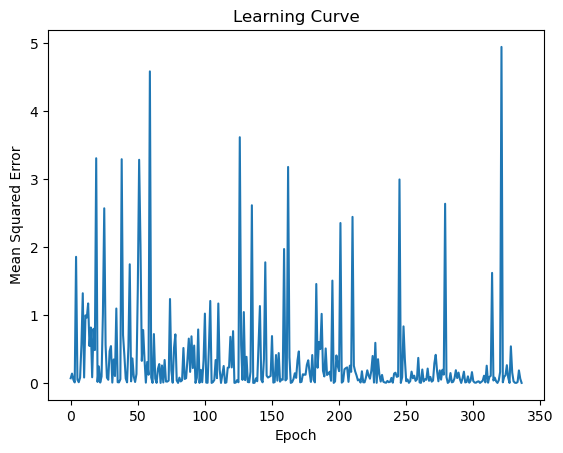

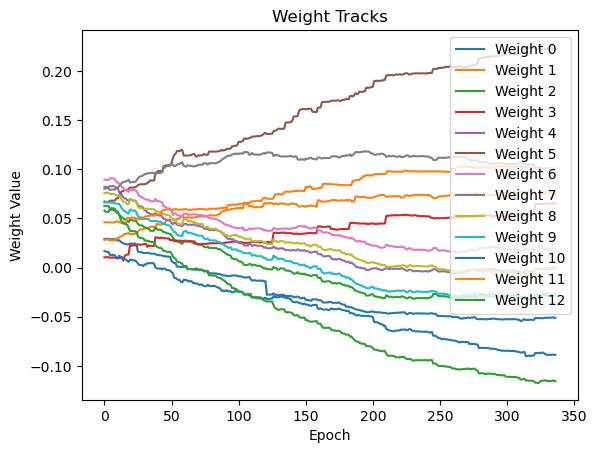

In [24]:
import matplotlib.pyplot as plt

# Plotting the learning curve
plt.figure()
plt.plot(np.arange(len(error_history)), error_history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.show()

# Plotting the weight tracks
plt.figure()
for i in range(X_train.shape[1]):
    plt.plot([w[i] for w in weight_history], label=f'Weight {i}')
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.title('Weight Tracks')
plt.legend()
plt.show()